In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 

(150, 4)


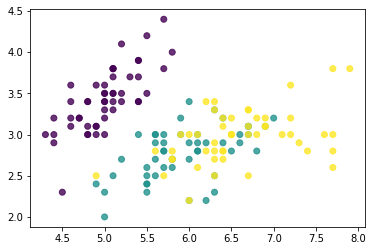

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

print(x.shape)
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.8)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) # on peut controler l'aléatoire par random_state=5 par exemple
print('train_set', x_train.shape)
print('test_set', x_test.shape)

train_set (120, 4)
test_set (30, 4)


Text(0.5, 1.0, 'Test Set')

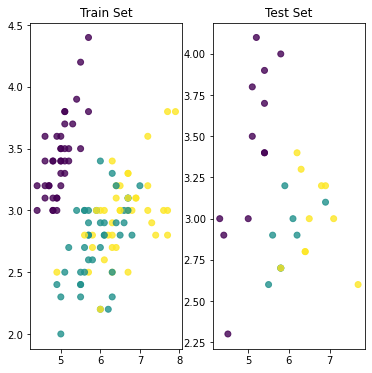

In [5]:
plt.figure(figsize=(6,6))
plt.subplot(121)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, alpha=0.8)
plt.title('Train Set')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, alpha=0.8)
plt.title('Test Set')


In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
print('Train Score :', model.score(x_train,y_train))
print('Test Score :', model.score(x_test,y_test))

Train Score : 1.0
Test Score : 0.9666666666666667


donc le modele est bon à 96.7 %. Pour l'améliorer il faut jouer sur les hyperparamétres.

In [8]:
model = KNeighborsClassifier(n_neighbors=3) # on augmente le nombre de voisins à 3
model.fit(x_train, y_train)
print('Train Score :', model.score(x_train,y_train))
print('Test Score :', model.score(x_test,y_test))

Train Score : 0.9583333333333334
Test Score : 0.9666666666666667


In [9]:
model = KNeighborsClassifier(n_neighbors=6) # on augmente le nombre de voisins à 6
model.fit(x_train, y_train)
print('Train Score :', model.score(x_train,y_train))
print('Test Score :', model.score(x_test,y_test))

Train Score : 0.9666666666666667
Test Score : 0.9666666666666667


In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring='accuracy')

array([1.        , 0.95833333, 0.95833333, 1.        , 0.91666667])

In [12]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring='accuracy').mean() # on calcule la moyenne

0.9666666666666668

In [13]:
cross_val_score(KNeighborsClassifier(1), x_train, y_train, cv=5, scoring='accuracy').mean() 

0.9583333333333334

In [14]:
cross_val_score(KNeighborsClassifier(2), x_train, y_train, cv=5, scoring='accuracy').mean() 

0.9416666666666668

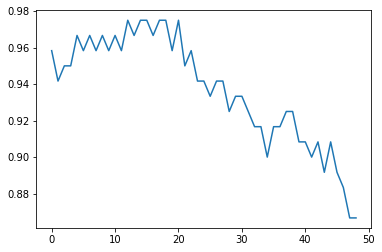

In [15]:
val_score =[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=5, scoring='accuracy').mean() 
    val_score.append(score)
    
plt.plot(val_score)

mais, la fonction validation curve permet de faire cela facillement.

In [16]:
from sklearn.model_selection import validation_curve

In [17]:
model = KNeighborsClassifier()
k = np.arange(1,50)
train_score, val_score = validation_curve(model, x_train, y_train,'n_neighbors', k, cv=5 )

In [18]:
val_score

array([[0.95833333, 0.95833333, 0.95833333, 1.        , 0.91666667],
       [0.95833333, 0.95833333, 0.91666667, 0.95833333, 0.91666667],
       [0.95833333, 0.95833333, 0.91666667, 1.        , 0.91666667],
       [0.95833333, 0.95833333, 0.91666667, 1.        , 0.91666667],
       [1.        , 0.95833333, 0.95833333, 1.        , 0.91666667],
       [0.95833333, 0.95833333, 0.95833333, 1.        , 0.91666667],
       [1.        , 0.95833333, 0.95833333, 1.        , 0.91666667],
       [0.95833333, 0.95833333, 0.95833333, 1.        , 0.91666667],
       [1.        , 0.95833333, 0.95833333, 1.        , 0.91666667],
       [0.95833333, 1.        , 0.91666667, 1.        , 0.91666667],
       [1.        , 0.95833333, 0.95833333, 1.        , 0.91666667],
       [0.95833333, 1.        , 0.91666667, 1.        , 0.91666667],
       [1.        , 1.        , 0.95833333, 1.        , 0.91666667],
       [1.        , 1.        , 0.91666667, 1.        , 0.91666667],
       [1.        , 1.        , 0.

In [19]:
val_score.mean(axis=1) #49 valeurs <===> moyennes des 49 lignes

array([0.95833333, 0.94166667, 0.95      , 0.95      , 0.96666667,
       0.95833333, 0.96666667, 0.95833333, 0.96666667, 0.95833333,
       0.96666667, 0.95833333, 0.975     , 0.96666667, 0.975     ,
       0.975     , 0.96666667, 0.975     , 0.975     , 0.95833333,
       0.975     , 0.95      , 0.95833333, 0.94166667, 0.94166667,
       0.93333333, 0.94166667, 0.94166667, 0.925     , 0.93333333,
       0.93333333, 0.925     , 0.91666667, 0.91666667, 0.9       ,
       0.91666667, 0.91666667, 0.925     , 0.925     , 0.90833333,
       0.90833333, 0.9       , 0.90833333, 0.89166667, 0.90833333,
       0.89166667, 0.88333333, 0.86666667, 0.86666667])

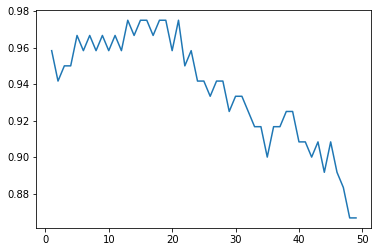

In [20]:
plt.plot(k, val_score.mean(axis=1), label='validation') #pour la representation ; on obtient le même graphe précedent.

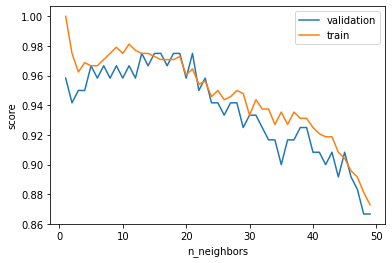

In [21]:
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid={'n_neighbors' : np.arange(1,20), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
grid.best_score_

0.975

In [27]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 13}

la meilleure metrique est euclidienne et le nombre de voisins 13.

In [29]:
modelopt = grid.best_estimator_ # sauvegarde du meilleur model (modelopt)

In [31]:
modelopt.score(x_test, y_test) # tester le model dans ce cas on a 96.66 % de réussite dans la vraie vie !

0.9666666666666667

Confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test, modelopt.predict(x_test))

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

 on une matrice 3x3 car 3 classes de fleurs dans le dataset iris.
on voit que : les 12 fleurs de la 1ere classe et celles de 3ème sont bien classées ; par contre 7 de la 2ème sont bien classées et 1 non.  

In [36]:
from sklearn.model_selection import learning_curve

In [39]:
N, train_score, val_score = learning_curve(modelopt, x_train, y_train, train_sizes = np.linspace(0.2, 1.0, 5), cv=5)

print(N)

[19 38 57 76 96]


np.linspace() : début 20% fin 100% et 5 lots. ainsi, le 1er lot contient 19 (ie 20%) ....et 5ème 96 (100%)

In [ ]:
maintenant graphique 

[19 24 30 35 41 46 52 57 63 68 74 79 85 90 96]


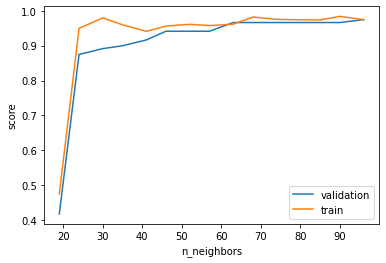

In [40]:
N, train_score, val_score = learning_curve(modelopt, x_train, y_train, train_sizes = np.linspace(0.2, 1.0, 15), cv=5)

print(N)
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.plot(N, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

on voit que à partir de 60 le modèle continue à stagné, donc inutile d'augmenter davantage.